# Proyecto Call of Duty

# Descripción del proyecto y origen del dataset

- Actualmente el video juego Call of Duty Modern Warfare es uno de los juegos en linea mas populares en el mundo.

- A la fecha se presenta una problemática referida a los tipos de jugadores que se pueden juntar en una partida (lobby) debido a que pueden haber jugadores con habilidades altas junto con jugadores con habilidades bajas.

- Este inconveniente genera que muchos jugadores nuevos que pueden tener un nivel de habilidad bajo terminen no disfrutando la experiencia de juego debido a que jugadores mas hábiles los eliminan de manera rápida.

- Además los jugadores de habilidad alta buscan siempre desafios mas elevados lo que jugar con jugadores principiantes (noobs) no permite su mejora.

- El fabricante Activision además necesita saber que tipos de jugadores tiene en general para poder ofrecer diferentes productos derivados del juego.

- Debido a esto, Activision se encuentra buscando una solución para poder crear lobbies donde se encuentren jugadores con habilidades similares.

- Para este caso se va a utilizar un dataset con los datos de juego de mas de 1500 jugadores para poder realizar un aprendizaje no supervisado. Los datos incluyen cantidad de victorias, derrotas, ratio de kills, deaths, asistencias entre otros.

- El dataset a utilizar se encontró en la plataforma Kaggle. 

- Ruta del data set: https://www.kaggle.com/datasets/aishahakami/call-of-duty-players

# Solución

Para dar solución a la problematica se va a utilizar el método clustering usando el algoritmo K-Means.

**Importar librerías para el proyecto**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

**Conectar a Google Drive para tener acceso al dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

MessageError: ignored

**Leer el dataset y mostrar sus columnas. A continuación se muestra la descripción de todas las columnas:**

* **name**: el nombre del jugador
* **wins** : número de veces que el jugador ganó una partida
* **kills** : número de muertes que el jugador hizo en todas sus partidas
* **kdRatio** : relación de eliminaciones a oponentes/muertes, lo que significa que si un jugador tiene 10 eliminaciones y 5 muertes, su KdRatio es igual a 2. Una KdRatio de 1 significa que el jugador murió exactamente tantas veces como eliminó con éxito a sus oponentes.
* **killstreak** : Eliminacion de varios jugadores enemigos sin morir.
* **level** : es el nivel del jugador (out)
* **losses** : número total de partidas perdidas
* **prestige**: es un modo opcional que los jugadores pueden elegir después de progresar al nivel 55. (out)
* **hits** : número de veces que el jugador daña a otro jugador (out)
* **timePlayed** : el tiempo en horas que el jugador dedica a jugar COD
* **headshots** : número de veces que el jugador daña a otros jugadores con disparos en la cabeza
* **averageTime** : tiempo promedio que dura una partida (out)
* **gamesPlayed** : número de veces que el jugador juega una partida multijugador (out)
* **assists** : número de veces que el jugador daña a un enemigo y un compañero mata al oponente
* **misses** : número de veces que el jugador falla un disparo (out)
* **xp** : es una cantidad numérica exclusiva del modo multijugador que determina el nivel y el progreso de un jugador en el juego. (out)
* **scorePerMinute** : una medida de cuántos puntos están ganando los jugadores por unidad de tiempo.
* **shots** : número de tiros que hizo el jugador (out)
* **deaths** : número de veces que el jugador es matado en el juego.

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cod.csv")
dataframe.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


**Preprocesamiento de Datos**

**Eliminar las columnas de atributos que no son necesarios para el proyecto. 
A criterio del equipo las siguientes columnas se eliminaron porque ninguna de ellas representa o influye en la habilidad del jugador.** 
* **level, prestige y xp**: El "nivel", "prestigio" y "puntos de experiencia" son datos relacionados a la experiencia del jugador mas no en su habilidad.
* **hits**: La "cantidad de veces que un jugador daña a un oponente" no es tan relevante como matar al oponente.
* **averageTime y gamesPlayed**: El "tiempo promedio de juego" y la "cantidad de juegos" sólo tiene relación con el tiempo que se le dedica al juego.
* **misses**: La "cantidad de disparos fallidos" no representa si el jugador tiene habilidad para el juego.
* **shots**: La "cantidad de disparos" puede representar disparos fallidos y acertados, no se sabe la precisión del disparo.



In [ ]:
dataframeDropped = dataframe.drop(
    ['level', 'prestige', 'hits', 'averageTime', 'gamesPlayed', 'misses', 'xp',
     'shots'],
    1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


**Mostrar las estadisticas del dataset como la cantidad de filas, el promedio, el valor mínimo, el valor máximo, etc.**

In [ ]:
dataframeDropped.describe()

,wins,kills,kdRatio,killstreak,losses,timePlayed,headshots,assists,scorePerMinute,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,4.998074,425.915918,630.672657,685.797176,107.868825,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,7.005778,786.182499,1305.150393,1518.383825,116.526676,7992.666443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.261442,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,14.000000
50%,10.000000,191.500000,0.732837,5.000000,2.000000,51.000000,32.000000,36.500000,56.793995,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,8.000000,485.500000,602.750000,609.750000,221.648976,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,80.000000,7479.000000,11719.000000,14531.000000,413.800000,67888.000000


**Visualizar el histograma de cada atributo del dataset**



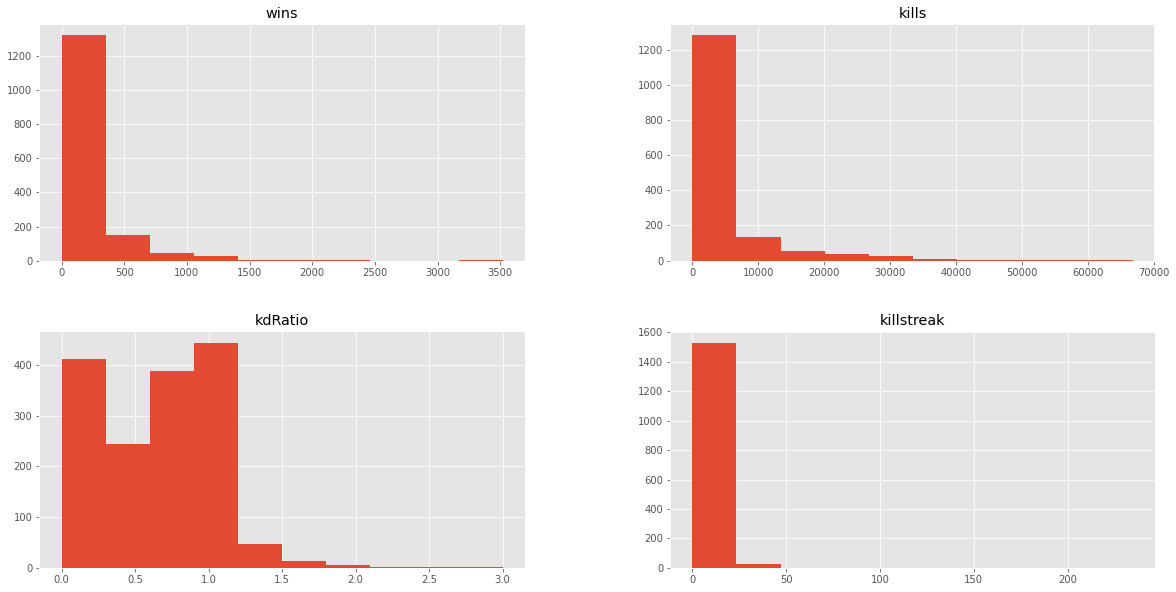

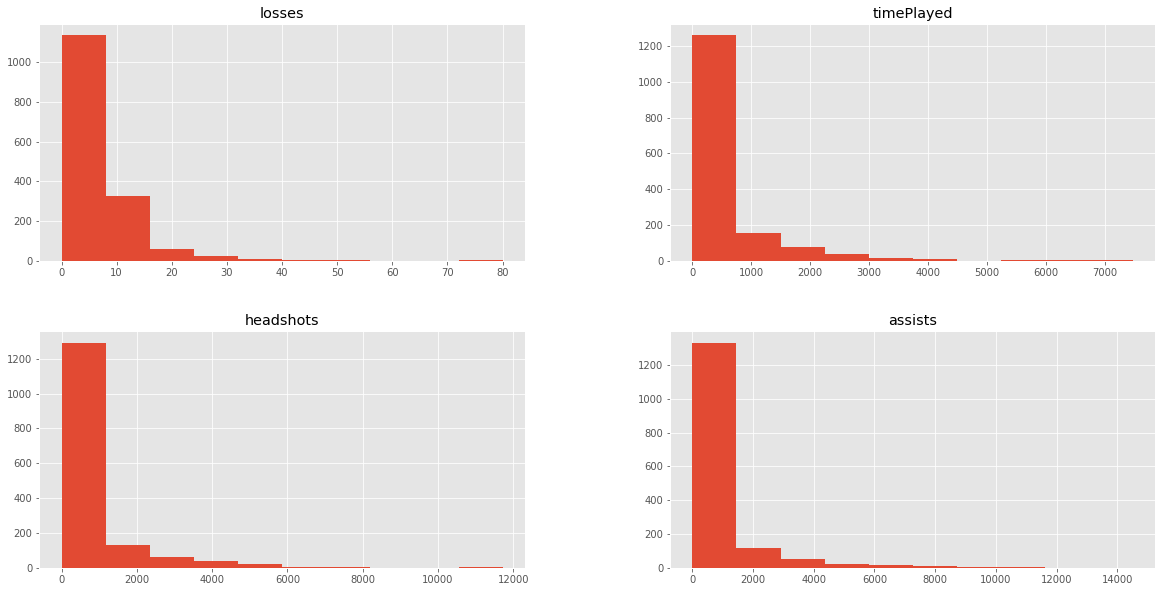

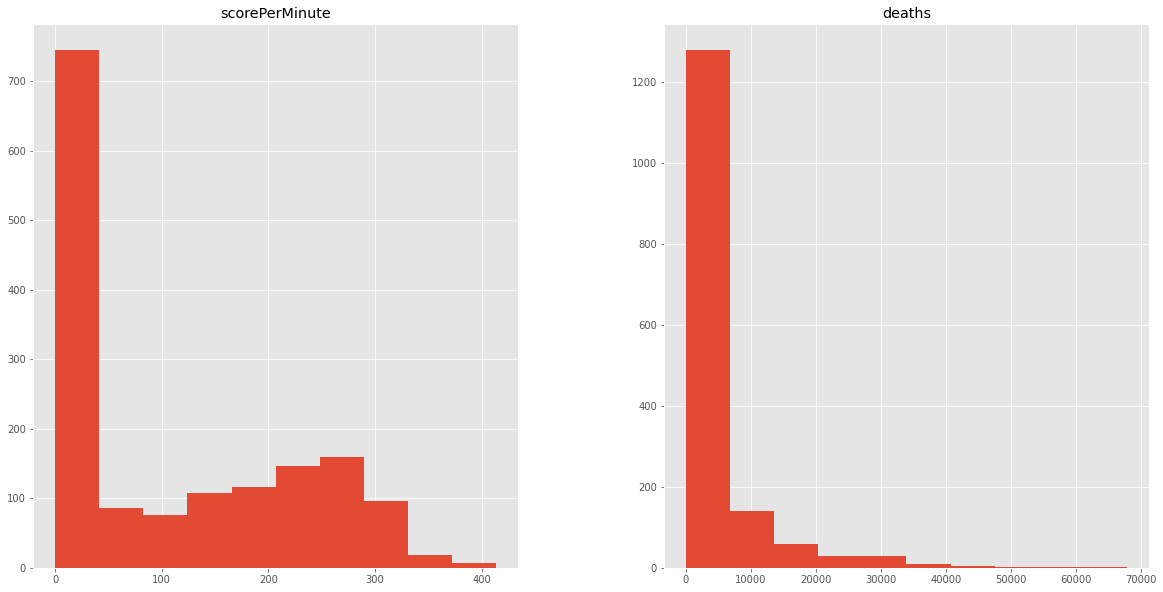

In [ ]:
dataframeDropped[['wins', 'kills', 'kdRatio', 'killstreak']].hist()
plt.show()
dataframeDropped[['losses', 'timePlayed', 'headshots', 'assists']].hist()
plt.show()
dataframeDropped[['scorePerMinute', 'deaths']].hist()
plt.show()

**Eliminación de outliers sobre todas las columnas**

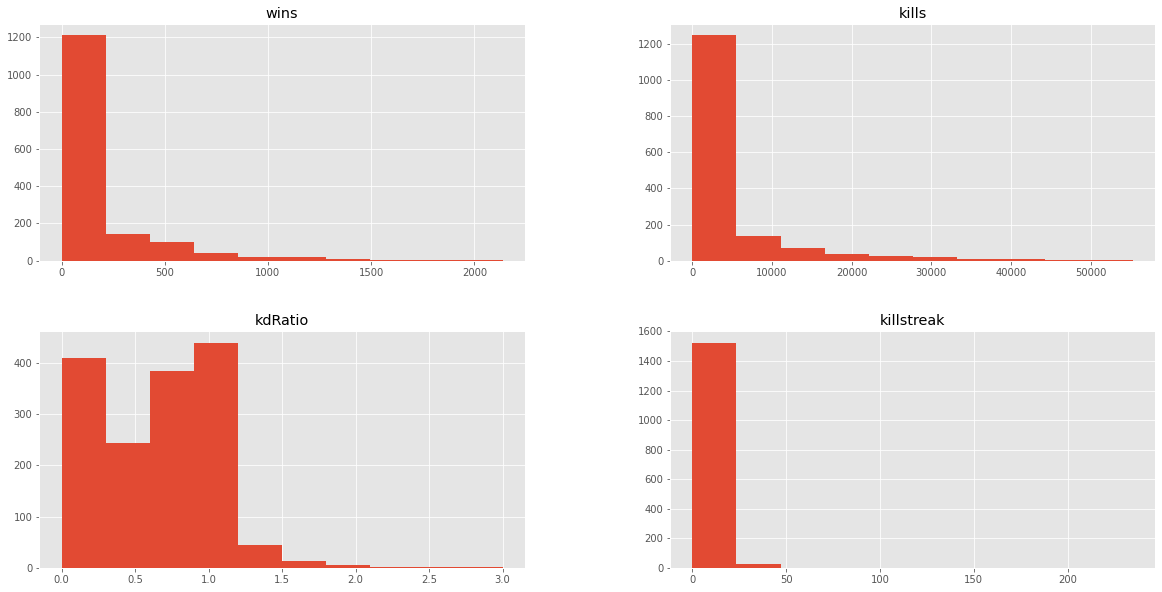

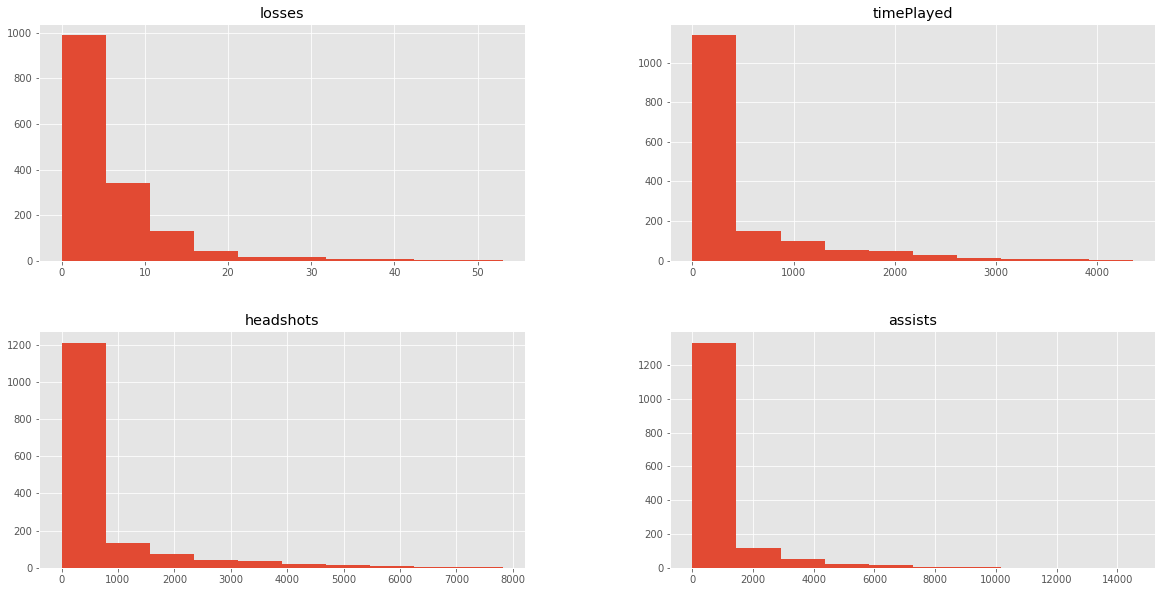

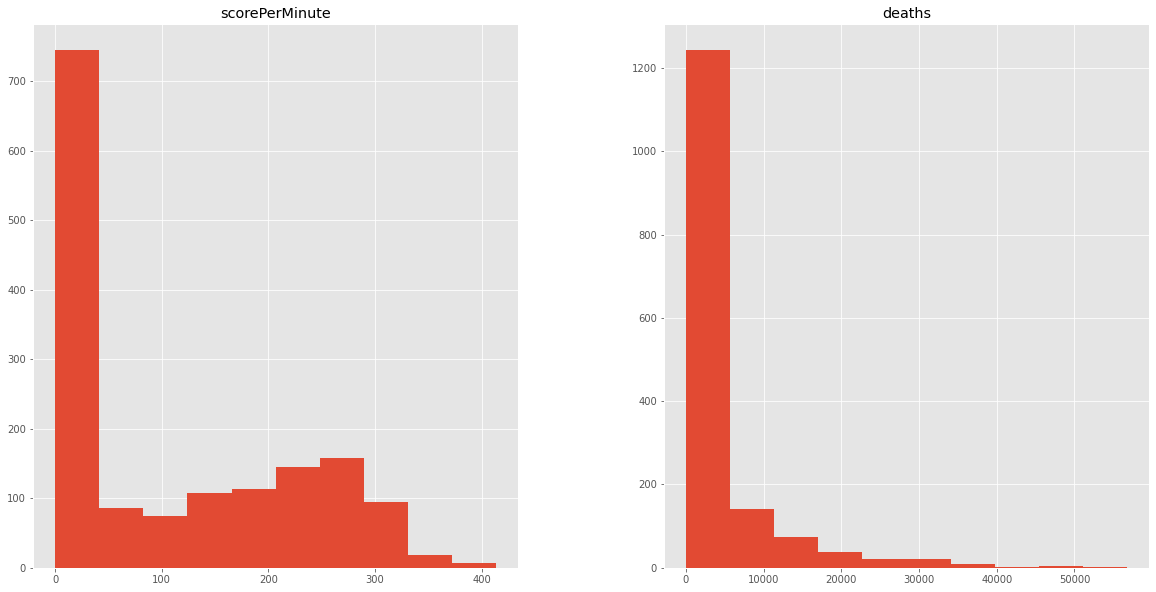

In [ ]:
filtered_data = dataframeDropped[
    (dataframeDropped['wins'] <= 2500) &
    (dataframeDropped['losses'] <= 56) &
    (dataframeDropped['timePlayed'] <= 4500) &
    (dataframeDropped['headshots'] <= 8200)
]

filtered_data[['wins', 'kills', 'kdRatio', 'killstreak']].hist()
plt.show()
filtered_data[['losses', 'timePlayed', 'headshots', 'assists']].hist()
plt.show()
filtered_data[['scorePerMinute', 'deaths']].hist()
plt.show()

**Mostrar la cantidad de filas y columnas resultantes de aplicar outliers**

In [ ]:
X = np.array(
    filtered_data[
        ['wins', 'kills', 'kdRatio', 'killstreak', 'losses', 'timePlayed',
         'headshots', 'assists', 'scorePerMinute', 'deaths']
    ]
)
X.shape

(1550, 10)

**Obtener el valor K para determinar el número de clusters**

k = número de clusters

Realizar una gráfica elbow o de codo nos sirve para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y el score. De esta forma podemos elegir el valor de k dónde se produce el “codo” de la curva.

La curva elbow nos muestra que un valor de k = 3 puede ser apropiado, aunque se podría probar con valores entre 2 y 4 y comparar resultados. No hay una única solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil con nuestros datos.

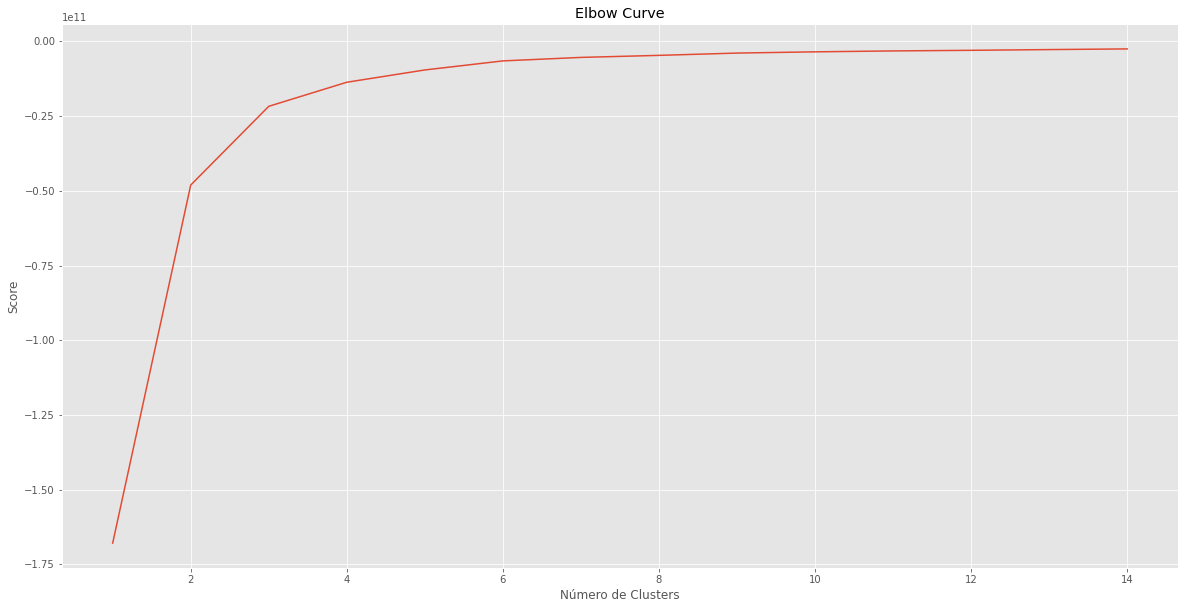

In [ ]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Ejecutar el algoritmo K-Means con 3 clusters y luego mostrar los centroides obtenidos**

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.01885442e+01 7.14473349e+02 5.51013087e-01 4.30151154e+00
  2.81066030e+00 1.35067621e+02 1.27408910e+02 1.33377088e+02
  8.70635480e+01 8.11940334e+02]
 [9.47000000e+02 2.88758667e+04 1.00350889e+00 2.10266667e+01
  1.61200000e+01 2.38288000e+03 4.54498667e+03 5.38021333e+03
  2.04385973e+02 2.90784133e+04]
 [4.68206422e+02 1.09766193e+04 9.94040807e-01 1.65137615e+01
  1.31238532e+01 1.26881651e+03 1.91421560e+03 1.95174771e+03
  1.90348824e+02 1.11919771e+04]]


**Mostrar en una gráfica 3D todos los grupos y apreciar si se diferencian respecto a sus centroides.**

Aqui podemos ver que el Algoritmo K-Means con K=3 ha agrupado a 1550 jugadores de COD por sus estadísticas de juego teniendo en cuenta las dimensiones que utilizamos. A continuación mostramos el gráfico con las variables wins, kills y kdratio. Se observa el agrupamiento de cada fila segun los 3 clusters definidos, tambien se observa que los centroides estan separados entre sí.

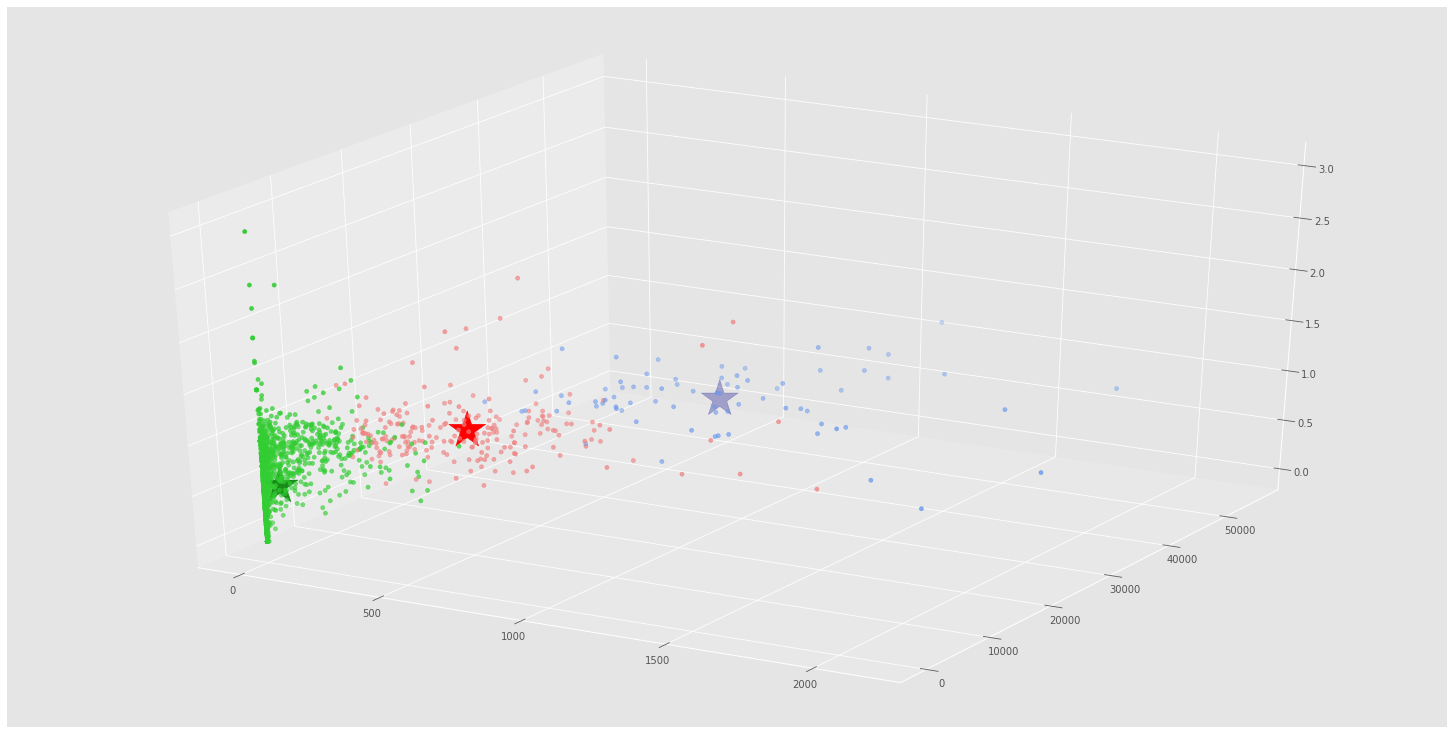

In [ ]:
# Predecir a que cluster pertenece cada fila
labels = kmeans.predict(X)
# Obtener los centroides
C = kmeans.cluster_centers_
# Colores para los elementos
colores = ['limegreen', 'cornflowerblue', 'lightcoral']
# Colores para los centroides
coloresCentroides = ['green', 'darkblue', 'red']
asignar = []
for row in labels:
    asignar.append(colores[row])

# Se separa el dataset segun la pertenencia de cada cluster
cluster1 = []
cluster2 = []
cluster3 = []
cont = 0
for t in labels:
    # Cluster color verde
    if t == 0:
      cluster1.append(cont)
    # Cluster color azul
    if t == 1:
      cluster2.append(cont)
    # Cluster color rojo
    if t == 2:
      cluster3.append(cont)
    cont = cont + 1

# Se grafica las dimensiones de wins, kills y kdratio
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='.', c=asignar, s=70)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=coloresCentroides, s=1500)

**Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:**

El primer cuadro a mostrar es la comparativa entre victorias (wins) y derrotas (losses). El gráfico nos muestra los centroides y su agrupación dependiendo de los dos atributos mencionados.

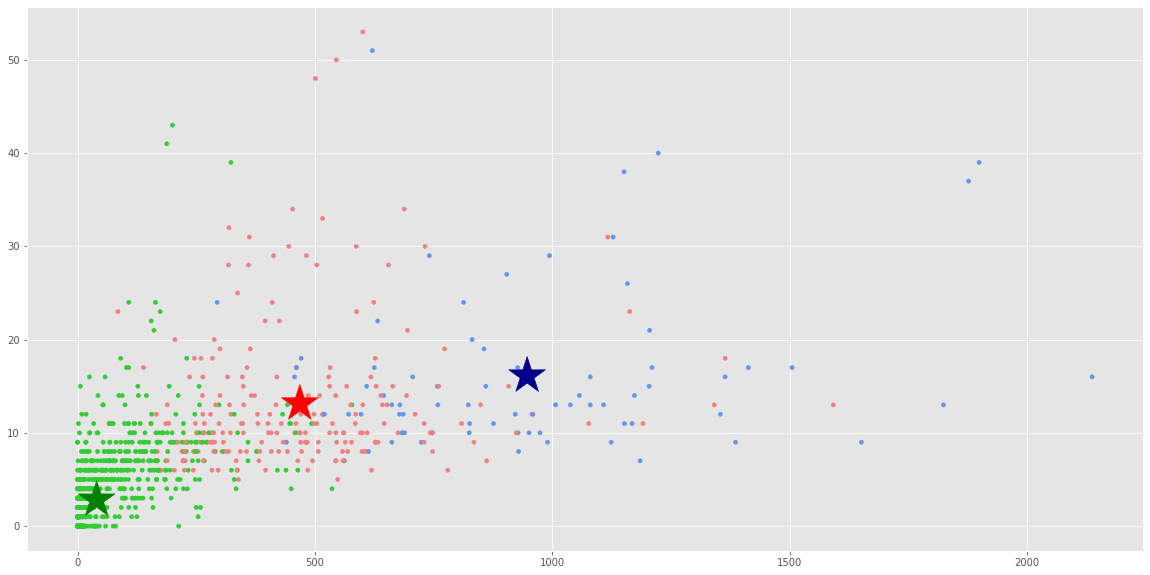

In [ ]:
# Getting the values and plotting it
f1 = filtered_data['wins'].values
f2 = filtered_data['losses'].values

plt.scatter(f1, f2, marker='.', c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 4], marker='*', c=coloresCentroides, s=1500)  # Pending to review
plt.show()

El segundo cuadro a mostrar es la comparativa entre matanzas (kills) y muertes (deaths). El gráfico nos muestra los centroides y su agrupación dependiendo de las dos columnas mencionadas.

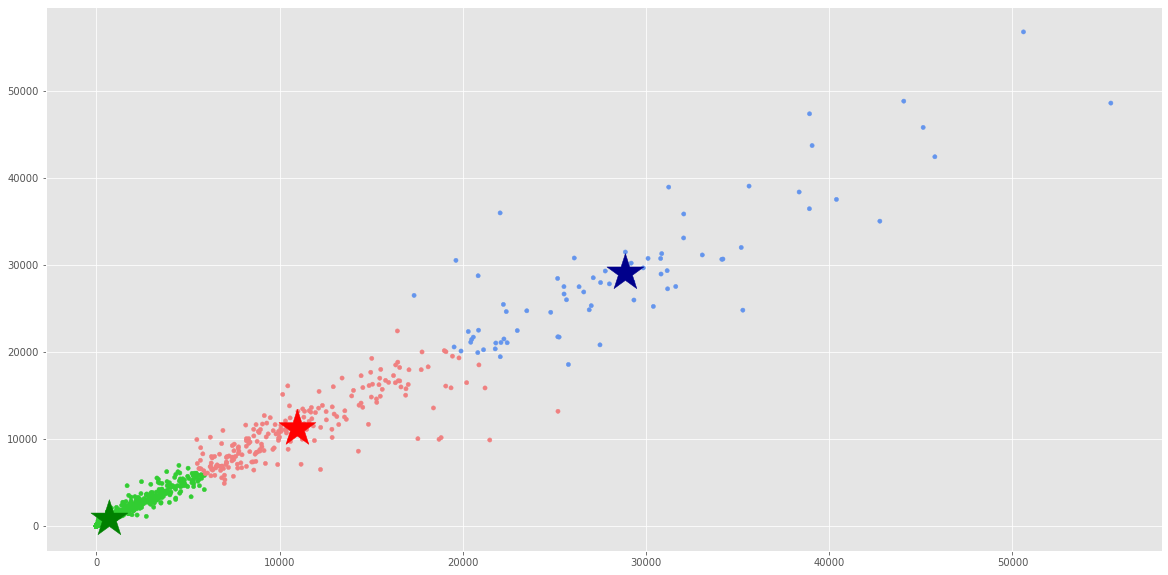

In [ ]:
# Getting the values and plotting it
f1 = filtered_data['kills'].values
f2 = filtered_data['deaths'].values

plt.scatter(f1, f2, marker='.', c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 9], marker='*', c=coloresCentroides, s=1500)
plt.show()

El útimo cuadro a mostrar es la comparativa entre matanzas (kills) y asistencias (assists). El gráfico nos muestra los centroides y su agrupación dependiendo de las dos columnas mencionadas.

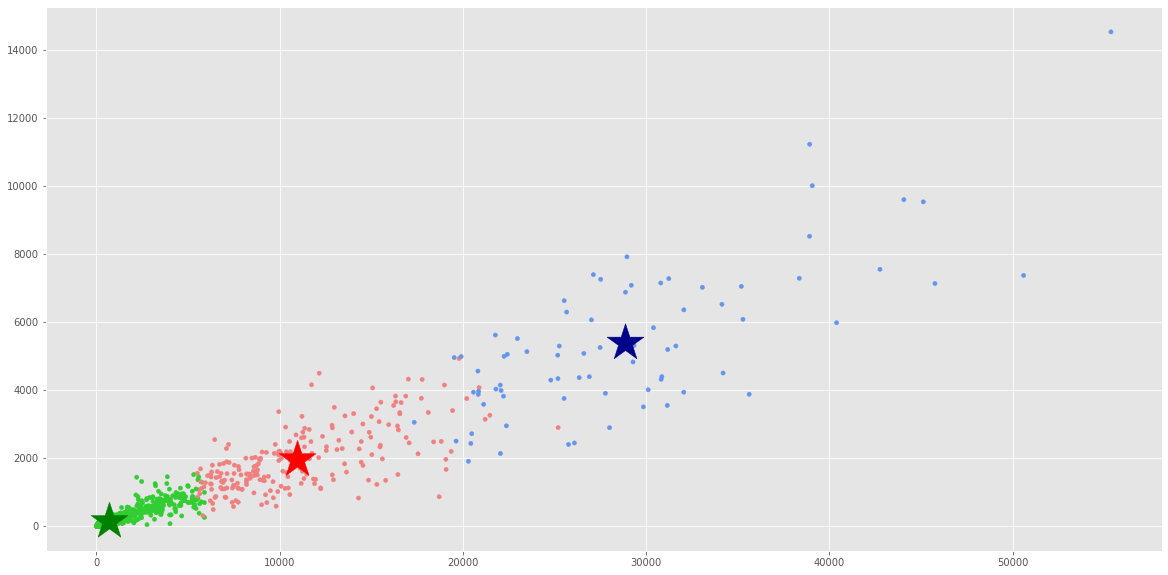

In [ ]:
f1 = filtered_data['kills'].values
f2 = filtered_data['assists'].values
plt.scatter(f1, f2, marker='.', c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 7], marker='*', c=coloresCentroides, s=1500)
plt.show()

**Mostrar la cantidad de usuarios que tiene cada cluster**

In [ ]:
copy =  pd.DataFrame()
copy['name'] = filtered_data['name'].values;
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,limegreen,1257
1,cornflowerblue,75
2,lightcoral,218


**Estadísticas de cada grupo**

- El grupo de color verde contiene el mayor número de jugadores.
 - El promedio de wins en este grupo es de 40. El jugador con mas victorias de este grupo es de 578.
 - El promedio de kills en este grupo es de 714. El jugador con mas kills de este grupo es de 5894.
 - El promedio de Score ganado por minuto en cada partida es de 87. El jugador con score por minuto mas alto de este grupo es de 413.

In [ ]:
# Cluster color verde [0]
df_cluster1 = filtered_data.iloc[cluster1]
df_cluster1.describe()

,wins,kills,kdRatio,killstreak,losses,timePlayed,headshots,assists,scorePerMinute,deaths
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,40.188544,714.473349,0.551013,4.301512,2.810660,135.067621,127.408910,133.377088,87.063548,811.940334
std,78.714717,1306.565749,0.425880,5.320517,4.187764,261.351822,238.905306,251.561792,114.851775,1417.027430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.135135,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,2.000000,47.000000,0.569741,1.000000,1.000000,21.000000,8.000000,7.000000,4.321199,87.000000
75%,40.000000,717.000000,0.888889,8.000000,5.000000,138.000000,131.000000,129.000000,186.800000,884.000000
max,578.000000,5894.000000,3.000000,26.000000,43.000000,2314.000000,1357.000000,1514.000000,413.800000,6971.000000


- El grupo de color azul contiene el menor número de jugadores.
 -  El promedio de wins en este grupo es de 947. El jugador con mas victorias de este grupo es de 2137.
 - El promedio de kills en este grupo es de 28875. El jugador con mas kills de este grupo es de 55368.
 - El promedio de Score ganado por minuto en cada partida es de 204. El jugador con score por minuto mas alto de este grupo es de 332.

In [ ]:
# Cluster color azul [1]
df_cluster2 = filtered_data.iloc[cluster2]
df_cluster2.describe()

,wins,kills,kdRatio,killstreak,losses,timePlayed,headshots,assists,scorePerMinute,deaths
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000
mean,947.000000,28875.866667,1.003509,21.026667,16.120000,2382.88000,4544.986667,5380.213333,204.385973,29078.413333
std,363.527723,7772.812598,0.141021,25.533747,8.627361,779.96748,1307.900871,2215.710052,51.973208,7932.652290
min,294.000000,17342.000000,0.612575,11.000000,7.000000,902.00000,1702.000000,1906.000000,93.650275,18564.000000
25%,681.500000,22309.500000,0.937744,14.000000,10.500000,1823.00000,3633.000000,3938.000000,164.398275,22482.500000
50%,904.000000,27488.000000,0.999427,18.000000,13.000000,2317.00000,4279.000000,5026.000000,212.636772,27824.000000
75%,1151.500000,31837.500000,1.068457,20.000000,17.000000,2944.00000,5342.000000,6753.000000,240.256334,31224.500000
max,2137.000000,55368.000000,1.422381,235.000000,51.000000,4022.00000,7819.000000,14531.000000,332.842222,56771.000000


- El grupo de color rojo contiene el segundo mayor número de jugadores.
 -  El promedio de wins en este grupo es de 468. El jugador con mas victorias de este grupo es de 1592.
 -  El promedio de kills en este grupo es de 10976. El jugador con mas kills de este grupo es de 25196.
 -  El promedio de Score ganado por minuto en cada partida es de 190. El jugador con score por minuto mas alto de este grupo es de 327.

In [ ]:
# Cluster color rojo [2]
df_cluster3 = filtered_data.iloc[cluster3]
df_cluster3.describe()

,wins,kills,kdRatio,killstreak,losses,timePlayed,headshots,assists,scorePerMinute,deaths
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,468.206422,10976.619266,0.994041,16.513761,13.123853,1268.816514,1914.215596,1951.747706,190.348824,11191.977064
std,229.698838,4053.825254,0.222537,12.236995,7.668133,687.854618,782.752490,911.270150,83.394918,3809.844379
min,66.000000,5488.000000,0.552002,8.000000,5.000000,283.000000,791.000000,304.000000,12.091344,4900.000000
25%,296.500000,7701.000000,0.871377,13.000000,9.000000,751.750000,1359.250000,1303.000000,131.878164,8003.000000
50%,436.000000,10035.500000,0.962271,15.000000,11.000000,1103.500000,1749.000000,1748.000000,201.967191,10713.500000
75%,583.000000,13624.000000,1.048437,18.000000,14.750000,1596.250000,2359.750000,2482.000000,259.979756,13607.500000
max,1592.000000,25196.000000,2.171183,179.000000,53.000000,4356.000000,4816.000000,4930.000000,327.760192,22415.000000


Segun las estadisticas se puede concluir lo siguiente

- El grupo de color azul contiene a los jugadores con un nivel de habilidad "ALTO". Ademas son los minoritarios.

- El grupo de color rojo contiene a los jugadores con un nivel de habilidad "MEDIO".

- El grupo de color verde contiene a los jugadores con un nivel de habilidad "PRINCIPIANTE". Ademas son la mayoria de los jugadores del dataset.

**Clasificar a un usuario ingresando sus estadísticas en el juego COD.**

In [ ]:
# Cluster PRINCIPIANTE
X_new_blue = np.array(
    [[15,	210,	1.33,	3,	2,	65,	39,	42,	67.9,	280.5]]
)
# Colocamos al nuevo jugador en el grupo al que pertenecerá
new_labels = kmeans.predict(X_new_blue)
print(new_labels)

[0]


In [ ]:
# Cluster ALTO
X_new_greeen = np.array(
    [[1763, 75062, 0.97, 15, 1438, 380, 14191, 19936, 1351.10, 77442]]
)
# Colocamos al nuevo jugador en el grupo al que pertenecerá
new_labels = kmeans.predict(X_new_greeen)
print(new_labels)

[1]


In [ ]:
# Cluster MEDIO
X_new_red = np.array(
    [[461,	10985,	1.99,	12,	17,	1271,	1911,	1945,	192.4,	11189]]
)
# Colocamos al nuevo jugador en el grupo al que pertenecerá
new_labels = kmeans.predict(X_new_red)
print(new_labels)

[2]


**Conclusiones**
- El objetivo del caso es utilizar una técnica de aprendizaje no supervisado para agrupar los jugadores descritos en el dataset.
- Se consigue realizar un agrupamiento de los jugadores con el uso del método de clustering.
- Al tener clusteres definidos, ante el ingreso de nuevos jugadores se les podrá agrupar según sus atributos.
- Para el análisis de outliers se uso la técnica de histogramas de cada atributo y se discriminó bajo criterio de expertos.
- Activision puede utilizar esta herramienta para agrupar a los jugadores en tres tipos de lobbies (ALTO, MEDIO y PRINCIPIANTE).
- El agrupamiento final ademas de ayudar a colocar a jugadores en los lobbies correspondientes segun su habilidad, puede permitir tomar otras decisiones segun las cantidades de cada grupo. Por ejemplo:
 - Vender objetos especiales para mejora de habilidad con ofertas al grupo con nivel "PRINCIPIANTE".
 - Invitar a eventos especiales de promoción del juego a los jugadores con nivel "ALTO". 
